# GTHA housing market database
# OSEMN methodology Step 2: Scrub
# Data quality issues discovered in the Teranet dataset

---

This notebook presents examples of data quality issues discovered in the Teranet dataset.

Previous steps included: 

* Step 2.1 

    * the spatial join between the Teranet points and the polygons of GTHA Dissemination Areas (DAs)
    
    * During step 2.1, Teranet records whose coordinates fall outside of the GTHA boundary (as defined by the DA geometry) have been filtered out (6,803,691 of the original 9,039,241 Teranet records remain in the dataset)
     
    * In addition to that, three new columns (`OBJECTID`, `DAUID`, and `CSDNAME`) derived from DA attributes have been added to each Teranet transaction

---

## Import dependencies

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from time import time

sns.set()

## Multiple transactions

In [2]:
data_path = '../../data/teranet/'
os.listdir(data_path)

['Teranet_consistent.csv', 'Teranet_with_DA_cols.csv', 'HHSaleHistory.csv']

## Load Teranet data

In [3]:
t = time()
#df = pd.read_csv(data_path + 'Teranet_with_DA_cols.csv',
#                 parse_dates=['registration_date'])
df = pd.read_csv(data_path + 'Teranet_with_DA_cols.csv')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


----- DataFrame loaded
in 19.72 seconds
with 6,803,691 rows
and 18 columns
-- Column names:
 Index(['lro_num', 'pin', 'consideration_amt', 'registration_date',
       'POSTAL_CODE', 'PROVINCE', 'UNITNO', 'STREET_NAME',
       'STREET_DESIGNATION', 'STREET_DIRECTION', 'MUNICIPALITY',
       'STREET_SUFFIX', 'STREET_NUMBER', 'X', 'Y', 'OBJECTID', 'DAUID',
       'CSDNAME'],
      dtype='object')


In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['lro_num', 'pin', 'consideration_amt', 'registration_date',
       'postal_code', 'province', 'unitno', 'street_name',
       'street_designation', 'street_direction', 'municipality',
       'street_suffix', 'street_number', 'x', 'y', 'objectid', 'dauid',
       'csdname'],
      dtype='object')

In [5]:
df['price'] = df['consideration_amt'].apply(lambda x: '{:,}'.format(x))

## Multiple transactions
There is a number of ways in which multiple transactions can be recorded in the Teranet dataset.

In [6]:
mask1 = df['pin'] == 248580237
df.loc[mask1, ['pin', 'registration_date', 'price', 'unitno', 
               'street_name', 'street_designation', 'municipality', 'y', 'x']]\
    .sort_values('registration_date')

,pin,registration_date,price,unitno,street_name,street_designation,municipality,y,x
163593,248580237,12/22/2011 0:00:00,"5,439,000.0",NaN,",3525,3535 & 3545 REBECCA STREET",NaN,OAKVILLE,43.383163,-79.737999
163478,248580237,5/2/2016 0:00:00,"10,504,865.0",NaN,",3525,3535 & 3545 REBECCA STREET",NaN,OAKVILLE,43.383163,-79.737999
163485,248580237,6/29/2017 0:00:00,2.0,NaN,",3525,3535 & 3545 REBECCA STREET",NaN,OAKVILLE,43.383163,-79.737999


In [7]:
mask1 = df['pin'] == 32063841
df.loc[mask1, ['pin', 'registration_date', 'price', 'unitno', 
               'street_name', 'street_designation', 'municipality', 'y', 'x']]\
    .sort_values('registration_date')

,pin,registration_date,price,unitno,street_name,street_designation,municipality,y,x
811529,32063841,8/23/2016 0:00:00,"1,005,000.0",NaN,- 298 KING ST. & 4 - 8 PARKER AVEN,NaN,RICHMOND HILL,43.943214,-79.465033
811530,32063841,8/23/2016 0:00:00,"1,005,000.0",NaN,- 298 KING ST. & 4 - 8 PARKER AVEN,NaN,RICHMOND HILL,43.943214,-79.465033
811531,32063841,8/23/2016 0:00:00,"2,280,000.0",NaN,- 298 KING ST. & 4 - 8 PARKER AVEN,NaN,RICHMOND HILL,43.943214,-79.465033
811532,32063841,8/23/2016 0:00:00,"1,310,000.0",NaN,- 298 KING ST. & 4 - 8 PARKER AVEN,NaN,RICHMOND HILL,43.943214,-79.465033
811533,32063841,8/23/2016 0:00:00,"1,100,000.0",NaN,- 298 KING ST. & 4 - 8 PARKER AVEN,NaN,RICHMOND HILL,43.943214,-79.465033
811534,32063841,8/23/2016 0:00:00,"2,140,000.0",NaN,- 298 KING ST. & 4 - 8 PARKER AVEN,NaN,RICHMOND HILL,43.943214,-79.465033
811535,32063841,8/23/2016 0:00:00,"2,260,000.0",NaN,- 298 KING ST. & 4 - 8 PARKER AVEN,NaN,RICHMOND HILL,43.943214,-79.465033


In [8]:
mask1 = df['street_name'].str.contains('&', na=False)
df.loc[mask1, ['pin', 'registration_date', 'unitno', 'street_name', 'street_designation', 'municipality']]

,pin,registration_date,unitno,street_name,street_designation,municipality
121142,250590032,6/7/1989 0:00:00,NaN,& 239 ARMSTRONG AVENUE,NaN,HALTON HILLS
121154,250590032,3/22/1993 0:00:00,NaN,& 239 ARMSTRONG AVENUE,NaN,HALTON HILLS
122722,250590032,10/7/2016 0:00:00,NaN,& 239 ARMSTRONG AVENUE,NaN,HALTON HILLS
122843,250590032,6/22/2017 0:00:00,NaN,& 239 ARMSTRONG AVENUE,NaN,HALTON HILLS
163478,248580237,5/2/2016 0:00:00,NaN,",3525,3535 & 3545 REBECCA STREET",NaN,OAKVILLE
163485,248580237,6/29/2017 0:00:00,NaN,",3525,3535 & 3545 REBECCA STREET",NaN,OAKVILLE
163593,248580237,12/22/2011 0:00:00,NaN,",3525,3535 & 3545 REBECCA STREET",NaN,OAKVILLE
421658,134130101,9/29/2008 0:00:00,NaN,"& 3450 RIDGEWAY DR., 3715 LAIRD RO",NaN,MISSISSAUGA
421775,134130101,1/15/2013 0:00:00,NaN,"& 3450 RIDGEWAY DR., 3715 LAIRD RO",NaN,MISSISSAUGA
691581,210180481,7/31/2009 0:00:00,NaN,& 332 REAR LEE AVENUE,NaN,TORONTO


### Difference in count of Teranet records by `municipality` and by `csd_name`

In [9]:
csd_counts = df['csdname'].value_counts()
mun_counts = df['municipality'].value_counts()
mun_csd_counts = mun_counts[csd_counts.index]
count_diff = csd_counts - mun_csd_counts
count_diff.sort_values()

Mississaugas of Scugog Island          0.0
East Gwillimbury                   20964.0
Aurora                             51646.0
Georgina                           55635.0
Halton Hills                       58581.0
Caledon                            74809.0
Clarington                         81350.0
Pickering                          82466.0
Ajax                               85529.0
Milton                             89322.0
Whitby                            105575.0
Oshawa                            128754.0
Oakville                          200609.0
Burlington                        201975.0
Richmond Hill                     208473.0
Vaughan                           283290.0
Markham                           301900.0
Hamilton                          463592.0
Brampton                          476770.0
Mississauga                       685494.0
Toronto                          2728480.0
Newmarket                              NaN
Whitchurch-Stouffville                 NaN
King       

> Can produce subsets of mismatching records and show value counts of `municipality` for each, to show how are these municipalities recorded within the Teranet dataset.

## Missing values

In [10]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803691 entries, 0 to 6803690
Data columns (total 19 columns):
lro_num               6803691 non-null int64
pin                   6803691 non-null int64
consideration_amt     6803691 non-null float64
registration_date     6803691 non-null object
postal_code           6233082 non-null object
province              6473471 non-null object
unitno                1571830 non-null float64
street_name           6598317 non-null object
street_designation    6211313 non-null object
street_direction      653205 non-null object
municipality          6799681 non-null object
street_suffix         43 non-null float64
street_number         6594322 non-null float64
x                     6803691 non-null float64
y                     6803691 non-null float64
objectid              6803691 non-null int64
dauid                 6803691 non-null int64
csdname               6803691 non-null object
price                 6803691 non-null object
dtypes: float64(6

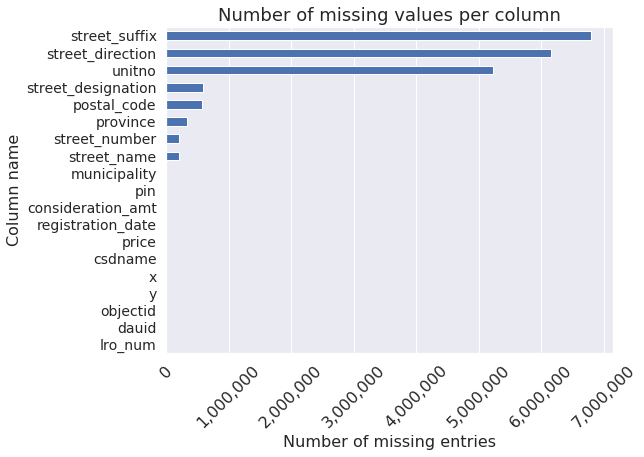

In [11]:
na_count = df.isnull().sum().sort_values()

f, ax = plt.subplots(1, figsize=(8, 6))
na_count.plot(kind='barh', ax=ax)
ax.grid(axis='y')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=14)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Number of missing values per column", fontsize=18)
ax.set_ylabel("Column name", fontsize=16)
ax.set_xlabel("Number of missing entries", fontsize=16)
plt.savefig('results/teranet_na_count.png', dpi=400, bbox_inches='tight')

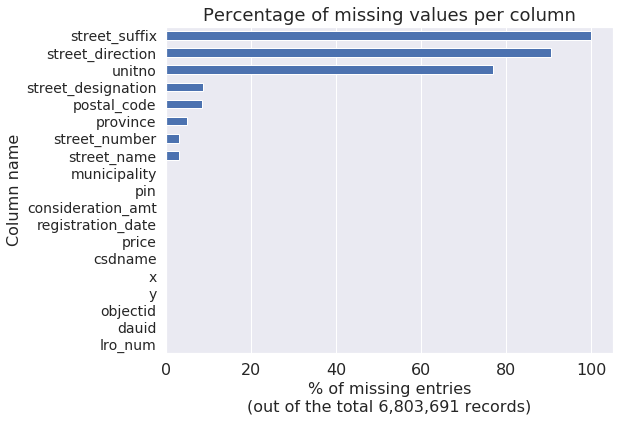

In [12]:
na_perc = df.isnull().sum().sort_values() / len(df) * 100

f, ax = plt.subplots(1, figsize=(8, 6))
na_perc.plot(kind='barh', ax=ax)
ax.grid(axis='y')
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Percentage of missing values per column", fontsize=18)
ax.set_ylabel("Column name", fontsize=16)
ax.set_xlabel("% of missing entries\n(out of the total {0:,} records)"
              .format(len(df)), fontsize=16)
plt.savefig('results/teranet_na_perc.png', dpi=400, bbox_inches='tight')

## NaN `consideration_amt` by decade

In [ ]:
# display number of non-null 'consideration_amt' and total number of entries per decade
price_nan = {} # empty dict to use in the loop
for decade, count in data.groupby('decade')['consideration_amt'].count().iteritems():
    price_nan[decade] = {
                         'non_null': int(count),
                         'null': int(data.groupby('decade')['consideration_amt'].size().loc[decade]) - count
                        }
price_nan_df = pd.DataFrame(price_nan) # generating a data frame 'price_nan_df' from dictionary 'price_nan'
price_nan_df_t = price_nan_df.T        # transposing the data frame 'price_nan_df' into 'price_nan_df_t'

price_nan_df_t['null_ratio'] = round(price_nan_df_t['null'] / price_nan_df_t['non_null'], 2)

# plotting results

# create a matplotlib figure and axes
_, ax1 = plt.subplots()
ax1.set_xlabel("Decade (from 180x to 201x)")
ax1.set_ylabel("Number of null and non-null records")
ax2 = ax1.twinx()
ax2.set_ylabel("Null/non-null ratio")
ax2.spines['right'].set_visible(True)
plt.title("Number of null and non-null values for 'consideration_amt' and null/non-null ratio per decade")

# select data to plot
null_counts = price_nan_df_t['null']
non_null_counts = price_nan_df_t['non_null']
nan_ratio = price_nan_df_t['null_ratio']
x = price_nan_df_t.index

# plot results
ax1.bar(x=x, height=non_null_counts, label='Null counts')
ax1.bar(x=x, height=null_counts, bottom=non_null_counts, label='Non-null counts')
ax2.plot(x, nan_ratio, lw=2, color='red', label='Null / non-null ratio')
ax1.legend(loc='upper left')
ax2.legend(loc='center left')
plt.margins(x=0)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()
price_nan_df_t.T